In [ ]:
# Inatalación, es necesario correr esta celda, de lo contrario el código no funcionara.:
! pip install pyomo
! apt-get update
! apt-get install -y glpk-utils



Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,675 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,934 kB]
Get:13 http://security.ubuntu.com/ubuntu j

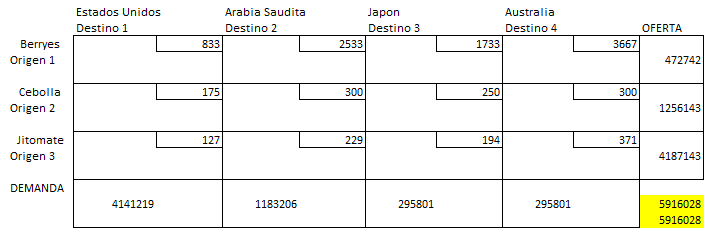

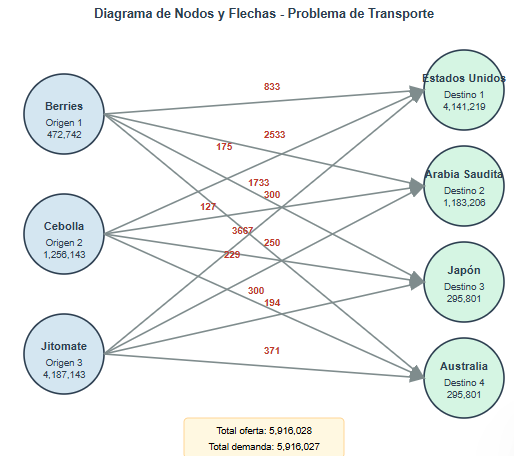


## Función Objetivo

$$
\text{Min } Z = 833x_{11} + 2533x_{12} + 1733x_{13} + 3667x_{14} + 175x_{21} + 300x_{22} + 250x_{23} + 300x_{24} + \\
127x_{31} + 229x_{32} + 194x_{33} + 371x_{34}
$$

## Restricciones

$$
\begin{aligned}
x_{11} + x_{21} + x_{31} &>= 4141219 \\
x_{12} + x_{22} + x_{32} &>= 1183206 \\
x_{13} + x_{23} + x_{33} &>= 295801 \\
x_{14} + x_{24} + x_{34} &>= 295801 \\
x_{11} + x_{12} + x_{13} + x_{14} &<= 472742 \\
x_{21} + x_{22} + x_{23} + x_{24} &<= 1256143 \\
x_{31} + x_{32} + x_{33} + x_{34} &<= 4187143
\end{aligned}
$$












GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpi0dn15lb.glpk.raw --wglp /tmp/tmpw6ljiev4.glpk.glp --cpxlp
 /tmp/tmpsfh3gl5o.pyomo.lp
Reading problem data from '/tmp/tmpsfh3gl5o.pyomo.lp'...
7 rows, 12 columns, 24 non-zeros
78 lines were read
Writing problem data to '/tmp/tmpw6ljiev4.glpk.glp'...
65 lines were written
GLPK Simplex Optimizer 5.0
7 rows, 12 columns, 24 non-zeros
Preprocessing...
7 rows, 12 columns, 24 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 7
      0: obj =   0.000000000e+00 inf =   5.916e+06 (4)
      6: obj =   1.358067268e+09 inf =   0.000e+00 (0)
*     8: obj =   1.322866949e+09 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (39693 bytes)
Writing basic solution to '/tmp/tmpi0dn15lb.glpk.raw'...
28 lines were written
Solver Status: ok
Termina

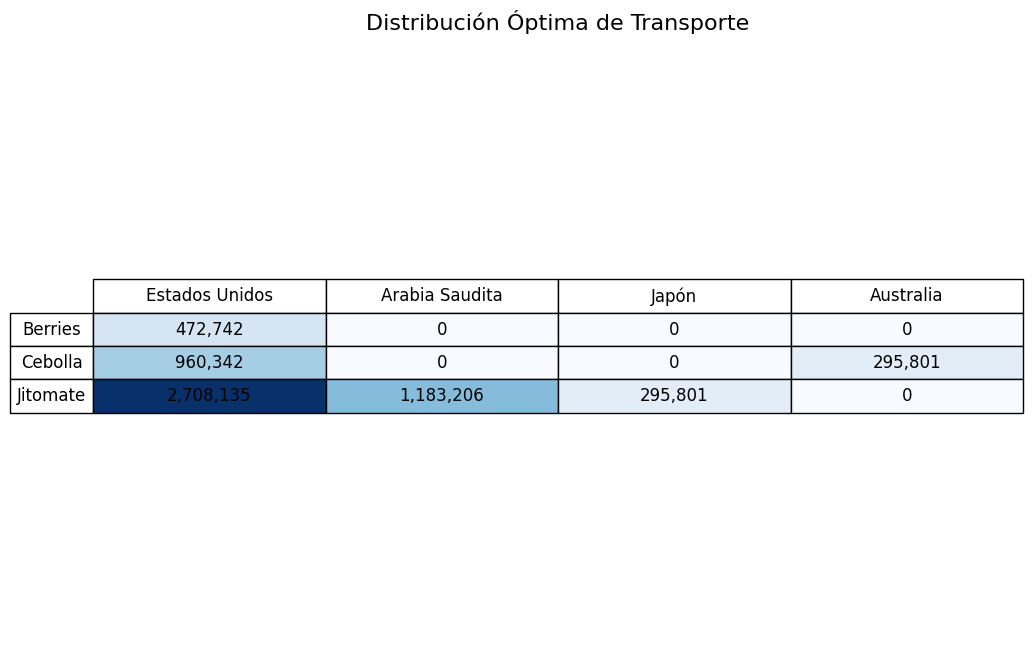

In [ ]:
# Modelo 1 Hacia todos los destinos

# Importamos las bibliotecas necesarias
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate

# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
# x11 Berries a Estados Unidos
# x12 Berries a Arabia Saudita
# x13 Berries a Japón
# x14 Berries a Australia
# x21 Cebolla a Estados Unidos
# x22 Cebolla a Arabia Saudita
# x23 Cebolla a Japón
# x24 Cebolla a Australia
# x31 Jitomate a Estados Unidos
# x32 Jitomate a Arabia Saudita
# x33 Jitomate a Japón
# x34 Jitomate a Australia

model.x_11 = Var(within=NonNegativeReals)
model.x_12 = Var(within=NonNegativeReals)
model.x_13 = Var(within=NonNegativeReals)
model.x_14 = Var(within=NonNegativeReals)
model.x_21 = Var(within=NonNegativeReals)
model.x_22 = Var(within=NonNegativeReals)
model.x_23 = Var(within=NonNegativeReals)
model.x_24 = Var(within=NonNegativeReals)
model.x_31 = Var(within=NonNegativeReals)
model.x_32 = Var(within=NonNegativeReals)
model.x_33 = Var(within=NonNegativeReals)
model.x_34 = Var(within=NonNegativeReals)

# Definimos la función objetivo
model.obj = Objective(expr=833*model.x_11 + 2533*model.x_12 + 1733*model.x_13 + 3667*model.x_14 +
                           175*model.x_21 + 300*model.x_22 + 250*model.x_23 + 300*model.x_24 +
                           127*model.x_31 + 229*model.x_32 + 194*model.x_33 + 371*model.x_34,
                      sense=minimize)

# Definimos las restricciones
# Restricciones de demanda (destinos)
model.con1 = Constraint(expr=model.x_11 + model.x_21 + model.x_31 >= 4141219)
model.con2 = Constraint(expr=model.x_12 + model.x_22 + model.x_32 >= 1183206)
model.con3 = Constraint(expr=model.x_13 + model.x_23 + model.x_33 >= 295801)
model.con4 = Constraint(expr=model.x_14 + model.x_24 + model.x_34 >= 295801)

# Restricciones de oferta (orígenes)
model.con5 = Constraint(expr=model.x_11 + model.x_12 + model.x_13 + model.x_14 <= 472742)
model.con6 = Constraint(expr=model.x_21 + model.x_22 + model.x_23 + model.x_24 <= 1256143)
model.con7 = Constraint(expr=model.x_31 + model.x_32 + model.x_33 + model.x_34 <= 4187142)

# Creamos un solver
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')

# Resolvemos el problema y guardamos los resultados
results = solver.solve(model, tee=True)

# Verificamos el estado de la solución
print("Solver Status:", results.solver.status)
print("Termination Condition:", results.solver.termination_condition)

# Función para visualizar los resultados en formato de tabla
def display_results_table(model):
    # Crear una matriz con los resultados
    data = [
        ["Berries (O1)", f"{value(model.x_11):,.0f}", f"{value(model.x_12):,.0f}", f"{value(model.x_13):,.0f}", f"{value(model.x_14):,.0f}", f"{472742:,.0f}"],
        ["Cebolla (O2)", f"{value(model.x_21):,.0f}", f"{value(model.x_22):,.0f}", f"{value(model.x_23):,.0f}", f"{value(model.x_24):,.0f}", f"{1256143:,.0f}"],
        ["Jitomate (O3)", f"{value(model.x_31):,.0f}", f"{value(model.x_32):,.0f}", f"{value(model.x_33):,.0f}", f"{value(model.x_34):,.0f}", f"{4187142:,.0f}"],
        ["DEMANDA", f"{4141219:,.0f}", f"{1183206:,.0f}", f"{295801:,.0f}", f"{295801:,.0f}", f"{5916027:,.0f}"]
    ]

    headers = ["Origen/Destino", "Estados Unidos (D1)", "Arabia Saudita (D2)", "Japón (D3)", "Australia (D4)", "OFERTA"]

    print("\nSOLUCIÓN ÓPTIMA - TABLA DE ASIGNACIÓN\n")
    print(tabulate(data, headers=headers, tablefmt="grid"))
    print(f"\nCosto total de transporte: ${value(model.obj):,.2f}")

# Función para visualizar los resultados gráficamente
def plot_transportation_flow(model):
    # Definir los orígenes y destinos
    origins = ["Berries", "Cebolla", "Jitomate"]
    destinations = ["Estados Unidos", "Arabia Saudita", "Japón", "Australia"]

    # Crear una matriz con los valores óptimos
    values = [
        [value(model.x_11), value(model.x_12), value(model.x_13), value(model.x_14)],
        [value(model.x_21), value(model.x_22), value(model.x_23), value(model.x_24)],
        [value(model.x_31), value(model.x_32), value(model.x_33), value(model.x_34)]
    ]

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(12, 8))

    # Definir la escala de colores
    cmap = plt.cm.Blues

    # Normalizar los valores para la escala de colores
    max_val = max(map(max, values))
    norm = plt.Normalize(0, max_val)

    # Crear la matriz de colores
    colors = [[cmap(norm(val)) for val in row] for row in values]

    # Crear la tabla
    table = ax.table(
        cellText=[[f"{val:,.0f}" for val in row] for row in values],
        rowLabels=origins,
        colLabels=destinations,
        cellColours=colors,
        loc='center',
        cellLoc='center',
        rowLoc='center',
        colLoc='center'
    )

    # Ajustar el tamaño de las celdas y fuentes
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)

    # Ocultar los ejes
    ax.axis('off')

    # Añadir título
    plt.title('Distribución Óptima de Transporte', fontsize=16)

    # Añadir una barra de color
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Cantidad transportada')

    # Añadir información sobre el costo total
    plt.figtext(0.5, 0.01, f"Costo total de transporte: ${value(model.obj):,.2f}",
                ha="center", fontsize=14, bbox={"facecolor":"orange", "alpha":0.2, "pad":5})

    # Guardar la figura
    plt.tight_layout()
    plt.savefig('transporte_optimo.png')
    plt.close()

    # Crear un gráfico de flujo de sankey
    try:
        import plotly.graph_objects as go
        from plotly.offline import plot

        # Preparar los datos para el diagrama de Sankey
        labels = origins + destinations

        # Orígenes (índices 0-2)
        source = []
        for i in range(3):  # 3 orígenes
            for j in range(4):  # 4 destinos
                source.append(i)

        # Destinos (índices 3-6)
        target = []
        for i in range(3):  # 3 orígenes
            for j in range(4):  # 4 destinos
                target.append(j + 3)  # Offset de 3 para los destinos

        # Valores de flujo
        value_list = []
        for row in values:
            for val in row:
                value_list.append(val)

        # Crear el diagrama de Sankey
        fig = go.Figure(data=[go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=labels,
                color=["blue", "green", "red", "cyan", "magenta", "yellow", "black"]
            ),
            link=dict(
                source=source,
                target=target,
                value=value_list
            )
        )])

        fig.update_layout(
            title_text="Flujo de Transporte Óptimo",
            font_size=12
        )

        # Guardar como HTML
        plot(fig, filename='sankey_diagram.html', auto_open=False)
        print("Diagrama de Sankey guardado como 'sankey_diagram.html'")
    except:
        print("No se pudo crear el diagrama de Sankey, asegúrate de tener instalado plotly")

# Mostramos los resultados si la solución es óptima
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print("\nSOLUCIÓN ÓPTIMA ENCONTRADA:\n")

    # Impresión detallada de los valores
    print(f"Valor óptimo de x_11 (Berries a Estados Unidos): {value(model.x_11):,.0f}")
    print(f"Valor óptimo de x_12 (Berries a Arabia Saudita): {value(model.x_12):,.0f}")
    print(f"Valor óptimo de x_13 (Berries a Japón): {value(model.x_13):,.0f}")
    print(f"Valor óptimo de x_14 (Berries a Australia): {value(model.x_14):,.0f}")
    print(f"Valor óptimo de x_21 (Cebolla a Estados Unidos): {value(model.x_21):,.0f}")
    print(f"Valor óptimo de x_22 (Cebolla a Arabia Saudita): {value(model.x_22):,.0f}")
    print(f"Valor óptimo de x_23 (Cebolla a Japón): {value(model.x_23):,.0f}")
    print(f"Valor óptimo de x_24 (Cebolla a Australia): {value(model.x_24):,.0f}")
    print(f"Valor óptimo de x_31 (Jitomate a Estados Unidos): {value(model.x_31):,.0f}")
    print(f"Valor óptimo de x_32 (Jitomate a Arabia Saudita): {value(model.x_32):,.0f}")
    print(f"Valor óptimo de x_33 (Jitomate a Japón): {value(model.x_33):,.0f}")
    print(f"Valor óptimo de x_34 (Jitomate a Australia): {value(model.x_34):,.0f}")
    print(f"Valor óptimo de Z (Costo total): ${value(model.obj):,.2f}")

    # Mostrar tabla resumen
    display_results_table(model)

    # Crear visualizaciones
    try:
        plot_transportation_flow(model)
        print("\nSe han generado visualizaciones gráficas de la solución.")
    except Exception as e:
        print(f"\nNo se pudieron generar las visualizaciones: {e}")
        print("Asegúrate de tener instaladas las bibliotecas matplotlib, pandas y tabulate.")

else:
    print("No se encontró una solución óptima.")
    print("Detalles del problema:", results.solver)

In [ ]:
# Modelo 2 omitiendo las variables no oficiales de venta

from pyomo.environ import *
import pandas as pd
from prettytable import PrettyTable

# Creamos el modelo
model = ConcreteModel()

# Definimos las variables de decisión
# x11 Berries a Estados Unidos
# x12 Berries a Arabia Saudita
# x13 Berries a Japón
# x14 Berries a Australia
# x21 Cebolla a Estados Unidos
# x23 Cebolla a Japón
# x31 Jitomate a Estados Unidos
# x33 Jitomate a Japón

model.x_11 = Var(within=NonNegativeReals)
model.x_12 = Var(within=NonNegativeReals)
model.x_13 = Var(within=NonNegativeReals)
model.x_14 = Var(within=NonNegativeReals)
model.x_21 = Var(within=NonNegativeReals)
model.x_23 = Var(within=NonNegativeReals)
model.x_31 = Var(within=NonNegativeReals)
model.x_33 = Var(within=NonNegativeReals)

# Definimos la función objetivo
model.obj = Objective(expr=833*model.x_11 + 2533*model.x_12 + 1733*model.x_13 + 3667*model.x_14 +
                           175*model.x_21 + 250*model.x_23 +
                           127*model.x_31 + 194*model.x_33,
                      sense=minimize)  # Minimizar costos de transporte

# Definimos las restricciones
# Restricciones de demanda (destinos)
model.con1 = Constraint(expr=model.x_11 + model.x_21 + model.x_31 >= 4141219)  # Demanda exacta Estados Unidos
model.con2 = Constraint(expr=model.x_12 <= 1183206)  # Demanda máxima Arabia Saudita
model.con3 = Constraint(expr=model.x_13 + model.x_23 + model.x_33 >= 295801)  # Demanda exacta Japón
model.con4 = Constraint(expr=model.x_14 <= 295801)  # Demanda máxima Australia

# Restricciones de oferta (orígenes)
model.con5 = Constraint(expr=model.x_11 + model.x_12 + model.x_13 + model.x_14 >= 472742)  # Toda la oferta de Berries
model.con6 = Constraint(expr=model.x_21 + model.x_23 <= 1256143)  # Hasta la oferta de Cebolla
model.con7 = Constraint(expr=model.x_31 + model.x_33 <= 4187142)  # Hasta la oferta de Jitomate

# Creamos un solver y resolvemos
solver = SolverFactory('glpk')
results = solver.solve(model)

# Verificamos el estado de la solución
print("Estado de terminación:", results.solver.termination_condition)
print("Estado del solver:", results.solver.status)

# Obtenemos los resultados
values = {
    "Berries a EE.UU": value(model.x_11),
    "Berries a Arabia Saudita": value(model.x_12),
    "Berries a Japón": value(model.x_13),
    "Berries a Australia": value(model.x_14),
    "Cebolla a EE.UU": value(model.x_21),
    "Cebolla a Japón": value(model.x_23),
    "Jitomate a EE.UU": value(model.x_31),
    "Jitomate a Japón": value(model.x_33)
}

# Costos por envío
costos = {
    "Berries a EE.UU": 833,
    "Berries a Arabia Saudita": 2533,
    "Berries a Japón": 1733,
    "Berries a Australia": 3667,
    "Cebolla a EE.UU": 175,
    "Cebolla a Japón": 250,
    "Jitomate a EE.UU": 127,
    "Jitomate a Japón": 194
}

# Calculamos beneficio total por envío
costo_total = {}
for ruta, cantidad in values.items():
    costo_total[ruta] = cantidad * costos[ruta]

# Creamos una tabla para visualizar los resultados
table = PrettyTable()
table.field_names = ["Ruta", "Cantidad", "costo por unidad", "costo total"]
for ruta, cantidad in values.items():
    table.add_row([ruta, f"{int(cantidad):,}", f"${costos[ruta]}", f"${int(costo_total[ruta]):,}"])

print("\n--- RESULTADOS DEL MODELO DE TRANSPORTE ---\n")
print(table)
print(f"\nCOSTO TOTAL ÓPTIMO: ${int(value(model.obj)):,}")

# Tabla resumen por destino
print("\n--- RESUMEN POR DESTINO ---")
destinos = {
    "EE.UU": value(model.x_11) + value(model.x_21) + value(model.x_31),
    "Arabia Saudita": value(model.x_12),
    "Japón": value(model.x_13) + value(model.x_23) + value(model.x_33),
    "Australia": value(model.x_14)
}

tabla_destinos = PrettyTable()
tabla_destinos.field_names = ["Destino", "Cantidad Total"]
for destino, cantidad in destinos.items():
    tabla_destinos.add_row([destino, f"{int(cantidad):,}"])
print(tabla_destinos)

# Tabla resumen por producto
print("\n--- RESUMEN POR PRODUCTO ---")
productos = {
    "Berries": value(model.x_11) + value(model.x_12) + value(model.x_13) + value(model.x_14),
    "Cebolla": value(model.x_21) + value(model.x_23),
    "Jitomate": value(model.x_31) + value(model.x_33)
}

tabla_productos = PrettyTable()
tabla_productos.field_names = ["Producto", "Cantidad Total"]
for producto, cantidad in productos.items():
    tabla_productos.add_row([producto, f"{int(cantidad):,}"])
print(tabla_productos)

Estado de terminación: optimal
Estado del solver: ok

--- RESULTADOS DEL MODELO DE TRANSPORTE ---

+--------------------------+-----------+------------------+--------------+
|           Ruta           |  Cantidad | costo por unidad | costo total  |
+--------------------------+-----------+------------------+--------------+
|     Berries a EE.UU      |  472,742  |       $833       | $393,794,086 |
| Berries a Arabia Saudita |     0     |      $2533       |      $0      |
|     Berries a Japón      |     0     |      $1733       |      $0      |
|   Berries a Australia    |     0     |      $3667       |      $0      |
|     Cebolla a EE.UU      |     0     |       $175       |      $0      |
|     Cebolla a Japón      |     0     |       $250       |      $0      |
|     Jitomate a EE.UU     | 3,668,477 |       $127       | $465,896,579 |
|     Jitomate a Japón     |  295,801  |       $194       | $57,385,394  |
+--------------------------+-----------+------------------+--------------+



In [ ]:
# modelo 3 con variables fictisias

from pyomo.environ import *
from prettytable import PrettyTable

# Creamos el modelo
model = ConcreteModel()

# Variables de decisión (solo rutas permitidas)
model.x_11 = Var(within=NonNegativeReals)  # Berries → USA
model.x_12 = Var(within=NonNegativeReals)  # Berries → Arabia
model.x_13 = Var(within=NonNegativeReals)  # Berries → Japón
model.x_14 = Var(within=NonNegativeReals)  # Berries → Australia
model.x_21 = Var(within=NonNegativeReals)  # Cebolla → USA
model.x_23 = Var(within=NonNegativeReals)  # Cebolla → Japón
model.x_31 = Var(within=NonNegativeReals)  # Jitomate → USA
model.x_33 = Var(within=NonNegativeReals)  # Jitomate → Japón

# Variables ficticias para el exceso de oferta
model.x_1_exceso = Var(within=NonNegativeReals)  # Berries → Exceso/Sumidero
model.x_2_exceso = Var(within=NonNegativeReals)  # Cebolla → Exceso/Sumidero
model.x_3_exceso = Var(within=NonNegativeReals)  # Jitomate → Exceso/Sumidero

# Función objetivo (minimizar costos de transporte)
# Costo 0 para las rutas ficticias de exceso
model.obj = Objective(expr=(
    833*model.x_11 + 2533*model.x_12 + 1733*model.x_13 + 3667*model.x_14 +
    175*model.x_21 + 250*model.x_23 +
    127*model.x_31 + 194*model.x_33 +
    0*model.x_1_exceso + 0*model.x_2_exceso + 0*model.x_3_exceso
), sense=minimize)

# Restricciones de demanda
model.con1 = Constraint(expr=model.x_11 + model.x_21 + model.x_31 == 4141219)  # USA
model.con2 = Constraint(expr=model.x_12 == 1183206)  # Arabia (solo Berries)
model.con3 = Constraint(expr=model.x_13 + model.x_23 + model.x_33 == 295801)  # Japón
model.con4 = Constraint(expr=model.x_14 == 295801)  # Australia (solo Berries)

# Restricción del sumidero ficticio (exceso)
model.con5 = Constraint(expr=(
    model.x_1_exceso + model.x_2_exceso + model.x_3_exceso == 4254678  # Exceso total
))

# Restricciones de oferta (balance de masa para cada producto)
model.con6 = Constraint(expr=(
    model.x_11 + model.x_12 + model.x_13 + model.x_14 + model.x_1_exceso == 4727420  # Berries
))
model.con7 = Constraint(expr=(
    model.x_21 + model.x_23 + model.x_2_exceso == 1256143  # Cebolla
))
model.con8 = Constraint(expr=(
    model.x_31 + model.x_33 + model.x_3_exceso == 4187142  # Jitomate
))

# Verificar balance total
total_demanda = 4141219 + 1183206 + 295801 + 295801 + 4254678
total_oferta = 4727420 + 1256143 + 4187142

print(f"Balance de masa - Total demanda: {total_demanda}")
print(f"Balance de masa - Total oferta: {total_oferta}")
print(f"Diferencia: {total_oferta - total_demanda}")

# Resolver el modelo
solver = SolverFactory('glpk')
results = solver.solve(model)

# Verificamos el estado de la solución
print("\nEstado de terminación:", results.solver.termination_condition)
print("Estado del solver:", results.solver.status)

# Obtener resultados
values = {
    "Berries a EE.UU": value(model.x_11),
    "Berries a Arabia Saudita": value(model.x_12),
    "Berries a Japón": value(model.x_13),
    "Berries a Australia": value(model.x_14),
    "Cebolla a EE.UU": value(model.x_21),
    "Cebolla a Japón": value(model.x_23),
    "Jitomate a EE.UU": value(model.x_31),
    "Jitomate a Japón": value(model.x_33)
}

excesos = {
    "Berries (exceso)": value(model.x_1_exceso),
    "Cebolla (exceso)": value(model.x_2_exceso),
    "Jitomate (exceso)": value(model.x_3_exceso)
}

# Costos por ruta
costos = {
    "Berries a EE.UU": 833,
    "Berries a Arabia Saudita": 2533,
    "Berries a Japón": 1733,
    "Berries a Australia": 3667,
    "Cebolla a EE.UU": 175,
    "Cebolla a Japón": 250,
    "Jitomate a EE.UU": 127,
    "Jitomate a Japón": 194
}

# Calculamos costo total por envío
costo_total = {}
for ruta, cantidad in values.items():
    costo_total[ruta] = cantidad * costos[ruta]

# Creamos una tabla para visualizar los resultados
table = PrettyTable()
table.field_names = ["Ruta", "Cantidad", "Costo por unidad", "Costo total"]
for ruta, cantidad in values.items():
    table.add_row([ruta, f"{int(cantidad):,}", f"${costos[ruta]}", f"${int(costo_total[ruta]):,}"])

print("\n--- RESULTADOS DEL MODELO DE TRANSPORTE ---\n")
print(table)
print(f"\nCOSTO TOTAL ÓPTIMO: ${int(value(model.obj)):,}")

# Tabla de excesos
tabla_excesos = PrettyTable()
tabla_excesos.field_names = ["Producto", "Exceso no distribuido"]
for producto, cantidad in excesos.items():
    tabla_excesos.add_row([producto, f"{int(cantidad):,}"])

print("\n--- EXCESOS (OFERTA NO DISTRIBUIDA) ---")
print(tabla_excesos)
print(f"Total de exceso: {int(sum(excesos.values())):,}")

# Tabla resumen por destino
print("\n--- RESUMEN POR DESTINO ---")
destinos = {
    "EE.UU": value(model.x_11) + value(model.x_21) + value(model.x_31),
    "Arabia Saudita": value(model.x_12),
    "Japón": value(model.x_13) + value(model.x_23) + value(model.x_33),
    "Australia": value(model.x_14),
    "Sumidero (exceso)": value(model.x_1_exceso) + value(model.x_2_exceso) + value(model.x_3_exceso)
}

tabla_destinos = PrettyTable()
tabla_destinos.field_names = ["Destino", "Cantidad Total"]
for destino, cantidad in destinos.items():
    tabla_destinos.add_row([destino, f"{int(cantidad):,}"])
print(tabla_destinos)

# Tabla resumen por producto
print("\n--- RESUMEN POR PRODUCTO ---")
productos = {
    "Berries (Total)": value(model.x_11) + value(model.x_12) + value(model.x_13) + value(model.x_14) + value(model.x_1_exceso),
    "Berries (Distribuido)": value(model.x_11) + value(model.x_12) + value(model.x_13) + value(model.x_14),
    "Cebolla (Total)": value(model.x_21) + value(model.x_23) + value(model.x_2_exceso),
    "Cebolla (Distribuido)": value(model.x_21) + value(model.x_23),
    "Jitomate (Total)": value(model.x_31) + value(model.x_33) + value(model.x_3_exceso),
    "Jitomate (Distribuido)": value(model.x_31) + value(model.x_33)
}

tabla_productos = PrettyTable()
tabla_productos.field_names = ["Producto", "Cantidad"]
for producto, cantidad in productos.items():
    tabla_productos.add_row([producto, f"{int(cantidad):,}"])
print(tabla_productos)

# Tasas de utilización
print("\n--- TASAS DE UTILIZACIÓN DE PRODUCTO ---")
utilizacion = PrettyTable()
utilizacion.field_names = ["Producto", "% Utilizado", "% No utilizado"]
berries_util = (value(model.x_11) + value(model.x_12) + value(model.x_13) + value(model.x_14)) / 4727420 * 100
cebolla_util = (value(model.x_21) + value(model.x_23)) / 1256143 * 100
jitomate_util = (value(model.x_31) + value(model.x_33)) / 4187142 * 100

utilizacion.add_row(["Berries", f"{berries_util:.2f}%", f"{100-berries_util:.2f}%"])
utilizacion.add_row(["Cebolla", f"{cebolla_util:.2f}%", f"{100-cebolla_util:.2f}%"])
utilizacion.add_row(["Jitomate", f"{jitomate_util:.2f}%", f"{100-jitomate_util:.2f}%"])
print(utilizacion)

Balance de masa - Total demanda: 10170705
Balance de masa - Total oferta: 10170705
Diferencia: 0

Estado de terminación: optimal
Estado del solver: ok

--- RESULTADOS DEL MODELO DE TRANSPORTE ---

+--------------------------+-----------+------------------+----------------+
|           Ruta           |  Cantidad | Costo por unidad |  Costo total   |
+--------------------------+-----------+------------------+----------------+
|     Berries a EE.UU      |     0     |       $833       |       $0       |
| Berries a Arabia Saudita | 1,183,206 |      $2533       | $2,997,060,798 |
|     Berries a Japón      |     0     |      $1733       |       $0       |
|   Berries a Australia    |  295,801  |      $3667       | $1,084,702,267 |
|     Cebolla a EE.UU      |  249,878  |       $175       |  $43,728,650   |
|     Cebolla a Japón      |     0     |       $250       |       $0       |
|     Jitomate a EE.UU     | 3,891,341 |       $127       |  $494,200,307  |
|     Jitomate a Japón     |  295